# Finding the right Estimator

In this notebook, we examine how different estimators perform in our prediction pipeline. First, we load the required dependencies and the data.

In [1]:
import warnings
import os
warnings.filterwarnings('ignore')
os.environ['PYTHONWARNINGS'] = 'ignore'

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders.one_hot import OneHotEncoder

from src import configuration as config
from src.pipeline.pipeline_factory import PipelineFactory, ModelType, EvaluationType

In [2]:
# load the data
train_df = config.load_traindata_for_pointwise()
pipelineFactory = PipelineFactory()
results = {}

***
## 1) Pointwise Regression

In [3]:
pipeline = pipelineFactory.create_pipeline(
    train_df,
    ModelType.POINTWISE_NORMALIZED_REGRESSION_NO_SEARCH,
    evaluation=EvaluationType.CROSS_VALIDATION,
    verbose_level=1,
    n_folds=5,
    workers=1,
    target="rank"
)
scores = {}

Creating pipeline ...


### 1.1) Baseline

In [4]:
from sklearn.dummy import DummyRegressor

pipeline.change_estimator(DummyRegressor())
pipeline.run()

scores['baseline'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:58<00:00, 11.67s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.0
    validation_average_spearman_fold_1: 0.0
    validation_average_spearman_fold_2: 0.0
    validation_average_spearman_fold_3: 0.0
    validation_average_spearman_fold_4: 0.0
    average of all folds: 0.0 [std=0.0]


### 1.2) Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

pipeline.change_estimator(LinearRegression())
pipeline.run()

scores['linear_regression'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:51<00:00, 10.20s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.1866
    validation_average_spearman_fold_1: 0.1802
    validation_average_spearman_fold_2: 0.1746
    validation_average_spearman_fold_3: 0.1853
    validation_average_spearman_fold_4: 0.1917
    average of all folds: 0.1837 [std=0.0058]


### 1.3) SVMs

In [6]:
from sklearn.svm import SVR

pipeline.change_estimator(SVR())
pipeline.run()

scores['svm'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [08:18<00:00, 99.69s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.368
    validation_average_spearman_fold_1: 0.3587
    validation_average_spearman_fold_2: 0.324
    validation_average_spearman_fold_3: 0.351
    validation_average_spearman_fold_4: 0.3443
    average of all folds: 0.3492 [std=0.0149]


### 1.4) K-Nearest-Neighbours

In [7]:
from sklearn.neighbors import KNeighborsRegressor

pipeline.change_estimator(KNeighborsRegressor())
pipeline.run()

scores['knn'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:06<00:00, 13.28s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.6121
    validation_average_spearman_fold_1: 0.613
    validation_average_spearman_fold_2: 0.583
    validation_average_spearman_fold_3: 0.578
    validation_average_spearman_fold_4: 0.6
    average of all folds: 0.5972 [std=0.0145]


### 1.5) Decision Trees

In [8]:
from sklearn.tree import DecisionTreeRegressor

pipeline.change_estimator(DecisionTreeRegressor())
pipeline.run()

scores['decision_tree'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:56<00:00, 11.38s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.6616
    validation_average_spearman_fold_1: 0.6746
    validation_average_spearman_fold_2: 0.6312
    validation_average_spearman_fold_3: 0.6531
    validation_average_spearman_fold_4: 0.6658
    average of all folds: 0.6572 [std=0.0147]


### 1.6) Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestRegressor

pipeline.change_estimator(RandomForestRegressor())
pipeline.run()

scores['random_forest'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:19<00:00, 27.91s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.7293
    validation_average_spearman_fold_1: 0.6968
    validation_average_spearman_fold_2: 0.6795
    validation_average_spearman_fold_3: 0.7076
    validation_average_spearman_fold_4: 0.6961
    average of all folds: 0.7019 [std=0.0164]


### 1.7) Light Gradient Boosting Machine

In [10]:
from lightgbm import LGBMRegressor

pipeline.change_estimator(LGBMRegressor())
pipeline.run()

scores['lgbm'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:06<00:00, 13.29s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.4813
    validation_average_spearman_fold_1: 0.4908
    validation_average_spearman_fold_2: 0.4607
    validation_average_spearman_fold_3: 0.466
    validation_average_spearman_fold_4: 0.4645
    average of all folds: 0.4726 [std=0.0115]


### 1.8) Neural Networks

In [11]:
from sklearn.neural_network import MLPRegressor

pipeline.change_estimator(MLPRegressor())
pipeline.run()

scores['neural_network'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:30<00:00, 30.02s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.4422
    validation_average_spearman_fold_1: 0.4627
    validation_average_spearman_fold_2: 0.4208
    validation_average_spearman_fold_3: 0.4352
    validation_average_spearman_fold_4: 0.4311
    average of all folds: 0.4384 [std=0.014]


random_forest        0.701861
decision_tree        0.657236
knn                  0.597216
lgbm                 0.472643
neural_network       0.438421
svm                  0.349203
linear_regression    0.183657
baseline             0.000000
dtype: float64

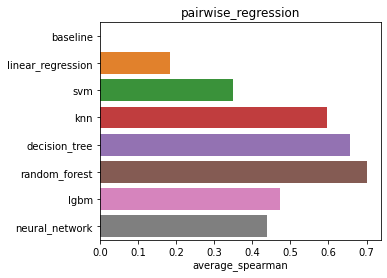

In [12]:
scores_df = pd.DataFrame(scores)
scores_df = scores_df.applymap(lambda x: x[0] if isinstance(x, list) else x)
scores_df.index = scores_df.index.str.replace('validation_', '')
scores_df = scores_df.rename_axis('metric')

scores_df = scores_df.mean()
display(scores_df.sort_values(ascending=False))
sns.barplot(x=scores_df, y=scores_df.index)
plt.title('pairwise_regression')
plt.xlabel('average_spearman')
plt.gcf().subplots_adjust(left=0.25)
plt.savefig('pointwise_regression_estimator_comparison.svg')
plt.show()

***
## 2) Pointwise Classification

In [3]:
pipeline = pipelineFactory.create_pipeline(
    train_df,
    ModelType.POINTWISE_CLASSIFICATION_NO_SEARCH,
    evaluation=EvaluationType.CROSS_VALIDATION,
    verbose_level=1,
    n_folds=5,
    workers=1,
    target="rank"
)
scores = {}

Creating pipeline ...


### 2.1) Baseline

In [4]:
from sklearn.dummy import DummyClassifier

pipeline.change_estimator(DummyClassifier())
pipeline.run()

scores['baseline'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:47<00:00,  9.42s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.0
    validation_average_spearman_fold_1: 0.0
    validation_average_spearman_fold_2: 0.0
    validation_average_spearman_fold_3: 0.0
    validation_average_spearman_fold_4: 0.0
    average of all folds: 0.0 [std=0.0]


### 2.2) SVMs

In [5]:
from sklearn.svm import SVC

pipeline.change_estimator(SVC())
pipeline.run()

scores['svm'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [12:42<00:00, 152.52s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.0
    validation_average_spearman_fold_1: -0.0016
    validation_average_spearman_fold_2: 0.0
    validation_average_spearman_fold_3: 0.0
    validation_average_spearman_fold_4: 0.0
    average of all folds: -0.0003 [std=0.0007]


### 2.3) K-Nearest-Neighbours

In [6]:
from sklearn.neighbors import KNeighborsClassifier

pipeline.change_estimator(KNeighborsClassifier())
pipeline.run()

scores['knn'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:49<00:00,  9.91s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.2931
    validation_average_spearman_fold_1: 0.3211
    validation_average_spearman_fold_2: 0.2638
    validation_average_spearman_fold_3: 0.2133
    validation_average_spearman_fold_4: 0.2648
    average of all folds: 0.2712 [std=0.0358]


### 2.4) Decision Trees

In [7]:
from sklearn.tree import DecisionTreeClassifier

pipeline.change_estimator(DecisionTreeClassifier())
pipeline.run()

scores['decision_tree'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:43<00:00,  8.76s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.6535
    validation_average_spearman_fold_1: 0.6117
    validation_average_spearman_fold_2: 0.6161
    validation_average_spearman_fold_3: 0.6262
    validation_average_spearman_fold_4: 0.6301
    average of all folds: 0.6275 [std=0.0146]


### 2.5) Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

pipeline.change_estimator(RandomForestClassifier())
pipeline.run()

scores['random_forest'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:18<00:00, 15.78s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.6446
    validation_average_spearman_fold_1: 0.6403
    validation_average_spearman_fold_2: 0.6216
    validation_average_spearman_fold_3: 0.5955
    validation_average_spearman_fold_4: 0.6634
    average of all folds: 0.6331 [std=0.023]


### 2.6) Light Gradient Boosting Machine

In [9]:
from lightgbm import LGBMClassifier

pipeline.change_estimator(LGBMClassifier())
pipeline.run()

scores['lgbm'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:19<00:00, 15.92s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.4593
    validation_average_spearman_fold_1: 0.4562
    validation_average_spearman_fold_2: 0.4495
    validation_average_spearman_fold_3: 0.4314
    validation_average_spearman_fold_4: 0.477
    average of all folds: 0.4547 [std=0.0148]


### 2.7) Neural Networks

In [10]:
from sklearn.neural_network import MLPClassifier

pipeline.change_estimator(MLPClassifier())
pipeline.run()

scores['neural_network'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [06:47<00:00, 81.45s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.231
    validation_average_spearman_fold_1: 0.2381
    validation_average_spearman_fold_2: 0.2125
    validation_average_spearman_fold_3: 0.1782
    validation_average_spearman_fold_4: 0.2431
    average of all folds: 0.2206 [std=0.0236]


In [12]:
all_scores = scores.copy()
scores.pop('baseline')
scores.pop('svm')

{'validation_average_spearman_fold_0': 0.0,
 'validation_average_spearman_fold_1': -0.001633817401512668,
 'validation_average_spearman_fold_2': 0.0,
 'validation_average_spearman_fold_3': 0.0,
 'validation_average_spearman_fold_4': 0.0}

random_forest     0.633075
decision_tree     0.627525
lgbm              0.454669
knn               0.271228
neural_network    0.220583
dtype: float64

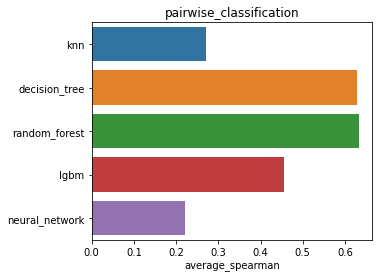

In [13]:
scores_df = pd.DataFrame(scores)
scores_df = scores_df.applymap(lambda x: x[0] if isinstance(x, list) else x)
scores_df.index = scores_df.index.str.replace('validation_', '')
scores_df = scores_df.rename_axis('metric')

scores_df = scores_df.mean()
display(scores_df.sort_values(ascending=False))
sns.barplot(x=scores_df, y=scores_df.index)
plt.title('pairwise_classification')
plt.xlabel('average_spearman')
plt.gcf().subplots_adjust(left=0.25)
plt.savefig('pointwise_classification_estimator_comparison.svg')
plt.show()

***
## 3) Pointwise Ordinal Regression

In [25]:
pipeline = pipelineFactory.create_pipeline(
    train_df,
    ModelType.POINTWISE_ORDINAL_REGRESSION_NO_SEARCH,
    evaluation=EvaluationType.CROSS_VALIDATION,
    verbose_level=1,
    n_folds=5,
    workers=1,
    target="rank"
)
scores = {}

Creating pipeline ...


### 3.1) Baseline

In [23]:
from sklearn.dummy import DummyClassifier

pipeline.change_estimator(DummyClassifier())
pipeline.run()

scores['baseline'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:56<00:00, 11.39s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.0
    validation_average_spearman_fold_1: 0.0
    validation_average_spearman_fold_2: 0.0
    validation_average_spearman_fold_3: 0.0
    validation_average_spearman_fold_4: 0.0
    average of all folds: 0.0 [std=0.0]


### 3.2) SVMs

In [24]:
from sklearn.svm import SVC

pipeline.change_estimator(SVC())
pipeline.run()

scores['svm'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


ValueError: y should be a 1d array, got an array of shape (36054, 31) instead.

### 3.3) K-Nearest-Neighbours

In [26]:
from sklearn.neighbors import KNeighborsClassifier

pipeline.change_estimator(KNeighborsClassifier())
pipeline.run()

scores['knn'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:40<00:00, 20.01s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.2761
    validation_average_spearman_fold_1: 0.2882
    validation_average_spearman_fold_2: 0.2718
    validation_average_spearman_fold_3: 0.228
    validation_average_spearman_fold_4: 0.2465
    average of all folds: 0.2621 [std=0.0218]


### 3.4) Decision Trees

In [27]:
from sklearn.tree import DecisionTreeClassifier

pipeline.change_estimator(DecisionTreeClassifier())
pipeline.run()

scores['decision_tree'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:59<00:00, 11.81s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.633
    validation_average_spearman_fold_1: 0.6482
    validation_average_spearman_fold_2: 0.6245
    validation_average_spearman_fold_3: 0.667
    validation_average_spearman_fold_4: 0.6355
    average of all folds: 0.6416 [std=0.0148]


### 3.5) Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

pipeline.change_estimator(RandomForestClassifier())
pipeline.run()

scores['random_forest'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:11<00:00, 38.21s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.4695
    validation_average_spearman_fold_1: 0.4802
    validation_average_spearman_fold_2: 0.4428
    validation_average_spearman_fold_3: 0.4463
    validation_average_spearman_fold_4: 0.5008
    average of all folds: 0.4679 [std=0.0216]


### 3.6) Light Gradient Boosting Machine

In [ ]:
from lightgbm import LGBMClassifier

pipeline.change_estimator(LGBMClassifier())
pipeline.run()

scores['lgbm'] = pipeline._validation_performance_scores

### 3.7) Neural Networks

In [29]:
from sklearn.neural_network import MLPClassifier

pipeline.change_estimator(MLPClassifier())
pipeline.run()

scores['neural_network'] = pipeline._validation_performance_scores

Starting pipeline using method: EvaluationType.CROSS_VALIDATION


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [06:10<00:00, 74.16s/it]

Finished running the pipeline
Evaluation metrics:
    validation_average_spearman_fold_0: 0.364
    validation_average_spearman_fold_1: 0.3819
    validation_average_spearman_fold_2: 0.3588
    validation_average_spearman_fold_3: 0.339
    validation_average_spearman_fold_4: 0.3352
    average of all folds: 0.3558 [std=0.0171]


decision_tree     0.641633
random_forest     0.467909
neural_network    0.355771
knn               0.262127
dtype: float64

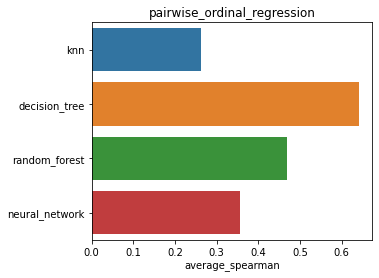

In [30]:
scores_df = pd.DataFrame(scores)
scores_df = scores_df.applymap(lambda x: x[0] if isinstance(x, list) else x)
scores_df.index = scores_df.index.str.replace('validation_', '')
scores_df = scores_df.rename_axis('metric')

scores_df = scores_df.mean()
display(scores_df.sort_values(ascending=False))
sns.barplot(x=scores_df, y=scores_df.index)
plt.title('pairwise_ordinal_regression')
plt.xlabel('average_spearman')
plt.gcf().subplots_adjust(left=0.25)
plt.savefig('pointwise_ordinal_regression_estimator_comparison.svg')
plt.show()